In [1]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt

In [2]:
# Any import of metpy will activate the accessors
import metpy.calc as mpcalc
#from metpy.testing import get_test_data
from metpy.units import units

In [17]:
# 数据读取
ds = xr.open_dataset('./MM85_89/MMEAN0089-01.nc',decode_times=False)
temp = ds['ts']

In [18]:
temp.shape

(1, 30, 115, 182)

In [23]:
temp = temp[0, 0]
temp

<xarray.DataArray 'ts' ()>
array(nan, dtype=float32)
Coordinates:
    lat      float32 90.0
    lon      float32 0.0
    lev      float32 -5.0
    time     float64 1.057e+03
Attributes:
    long_name:  temperature
    units:      centigrade

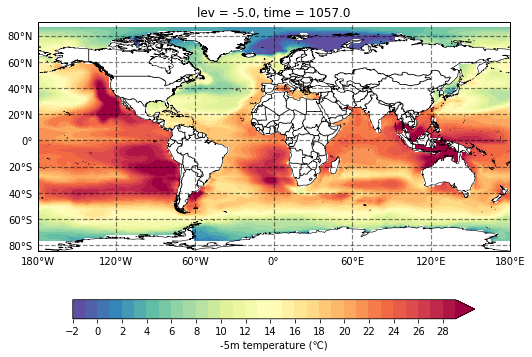

In [22]:
# 创建画图空间
proj = ccrs.PlateCarree()  #创建投影
fig = plt.figure(figsize=(9,6))  #创建页面
ax = fig.subplots(1, 1, subplot_kw={'projection': proj})  #子图
# 设置地图属性:加载国界、海岸线、河流、湖泊
ax.add_feature(cfeat.BORDERS.with_scale('50m'), linewidth=0.8, zorder=1)
ax.add_feature(cfeat.COASTLINE.with_scale('50m'), linewidth=0.6, zorder=1)  
#ax.add_feature(cfeat.RIVERS.with_scale('50m'), zorder=1)  
#ax.add_feature(cfeat.LAKES.with_scale('50m'), zorder=1)  
# 设置网格点属性
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, 
  linewidth=1.2, color='k', alpha=0.5, linestyle='--')
gl.xlabels_top = False  #关闭顶端标签
gl.ylabels_right = False  #关闭右侧标签
gl.xformatter = LONGITUDE_FORMATTER  #x轴设为经度格式
gl.yformatter = LATITUDE_FORMATTER  #y轴设为纬度格式
# 设置colorbar
cbar_kwargs = {
   'orientation': 'horizontal',
   'label': '-5m temperature (℃)',
   'shrink': 0.8,
   'ticks': np.arange(-2,30,2)
}
levels = np.arange(-2,30,1)
temp.plot.contourf(ax=ax, levels=levels, cmap='Spectral_r', 
    cbar_kwargs=cbar_kwargs, transform=ccrs.PlateCarree())
fig.show()

In [21]:
temp

<xarray.DataArray 'ts' (lat: 115, lon: 182)>
array([[     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [2.636146, 2.758839, 2.847273, ..., 2.507183, 2.636146, 2.758839],
       ...,
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 90.0 88.0 86.0 84.0 82.0 ... -72.0 -74.0 -76.0 -78.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 354.0 356.0 358.0 360.0 362.0
    lev      float32 -5.0
    time     float64 1.057e+03
Attributes:
    long_name:  temperature
    units:      centigrade